# Introduction to Logistic Regression

---

### Learning Objectives
- Distinguish between regression and classification problems.
- Understand how logistic regression is similar to and different from linear regression.
- Understand the math behind the logit link function (and logistic function).
- Plot the logistic regression for predicting admittance from GPA.
- Understand how to interpret the coefficients of logistic regression.
- Know the benefits of logistic regression as a classifier.

<a id='introduction'></a>

## Introduction

---

Logistic regression is a natural bridge to connect regression and classification.
- Logistic regression is the most common binary classification algorithm.
- Because it is a regression model, logistic regression will predict continuous values.
    - Logistic regression will predict continuous probabilities between 0 and 1.
    - Example: What is the probability that someone shows up to vote?
- However, logistic regression almost always operates as a classification model.
    - Logistic regression will use these continuous predictions to classify something as 0 or 1.
    - Example: Based on the predicted probability, do we predict that someone votes?

**Some examples of when logistic regression could be used:**
- Will a user will purchase a product, given characteristics like income, age, and number of family members?
- Does this patient have a specific disease based on their symptoms?
- Will a person default on their loan?
- Is the iris flower in front of me an "_Iris versicolor_?"
- Given one's GPA and the prestige of a college, will a student be admitted to a specific graduate program?

And many more.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression, LinearRegression

<a id='load-data'></a>

## Graduate School Admissions

---

Today, we'll be applying logistic regression to solve the following problem: "Given one's GPA and the prestige of a college, will a student be admitted to a specific graduate program?"

In [2]:
# Read in the data.
admissions = pd.read_csv('data/admissions.csv')

In [3]:
# Check first five rows.
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


The four columns are:
- `admit`: A binary 0/1 variable indicating whether or not a student was admitted, where 1 means admitted and 0 means not admitted.
- `gre`: The student's [GRE (Graduate Record Exam)](https://en.wikipedia.org/wiki/Graduate_Record_Examinations) score.
- `gpa`: The student's GPA.
- `prestige`: A 1-4 rating for the college's "prestige."

In [4]:
# Check for missing values.
admissions.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [5]:
admissions.shape

(400, 4)

In [6]:
# Drop every row that has an NA.
admissions = admissions.dropna()

<details><summary>What assumption are we making when we drop rows that have at least one NA in it?</summary>
    
- We assume that what we drop looks like what we have observed. That is, there's nothing special about the rows we happened to drop.
- We might say that what we dropped is a random sample of our whole data.
- It's not important to know this now, but the formal term is that our data is missing completely at random.
</details>

<details><summary>Suppose I want to check if a value of 1 for prestige means "most prestigious" or "least prestigious." How might I find this out?</summary>
    
- Check a data dictionary to see if the answer exists.
- If a data dictionary doesn't exist, compare prestige to admit. You could use [groupby](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.groupby.html) to make a table or you could use a plot.
</details>

In [7]:
# Compare prestige to admit using groupby.
# Find the mean prestige score of people who were and weren't admitted.

admissions.groupby(by='admit')['prestige'].mean()

admit
0    2.645756
1    2.150794
Name: prestige, dtype: float64

In [8]:
admissions.groupby('admit')['gre'].mean()

admit
0    573.579336
1    618.571429
Name: gre, dtype: float64

## Recap of Notation

You're quite familiar with **linear** regression:

### $$
\begin{eqnarray*}
\hat{Y} &=& \hat{\beta}_0 + \hat{\beta}_1X_1 + \hat{\beta}_2X_2 + \cdots + \hat{\beta}_pX_p \\
&=& \hat{\beta}_0 + \sum_{j=1}^p\hat{\beta}_jX_j
\end{eqnarray*}
$$

Where:
- $\hat{Y}$ is the predicted value of $Y$ based on all of the inputs $X_j$.
- $X_1$, $X_2$, $\ldots$, $X_p$ are the predictors.
- $\hat{\beta}_0$ is the estimated intercept.
- $\hat{\beta}_j$ is the estimated coefficient for the predictor $X_j$, the $j$th column in variable matrix $\mathbf{X}$.


<a id='pred-admit'></a>

## What If We Predicted `admit` With `gpa` Using Linear Regression?

---

Let's try predicting the `admit` binary indicator using just `gpa` with a linear regression to see what goes wrong.

In [9]:
admit = admissions

In [10]:
y = admit['admit']
X = admit[['gpa']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


linmod = LinearRegression()
linmod.fit(X_train, y_train)

print(f'Intercept: {linmod.intercept_}')
print(f'Coefficient: {linmod.coef_}')

Intercept: -0.7247420986411002
Coefficient: [0.29798918]


<a id='plot-reg'></a>
### What do those coefficients mean?  Plot `admit` (our $Y$) against `gpa` (our $X$).

Looking at the plot below, what are problems with using a regression?

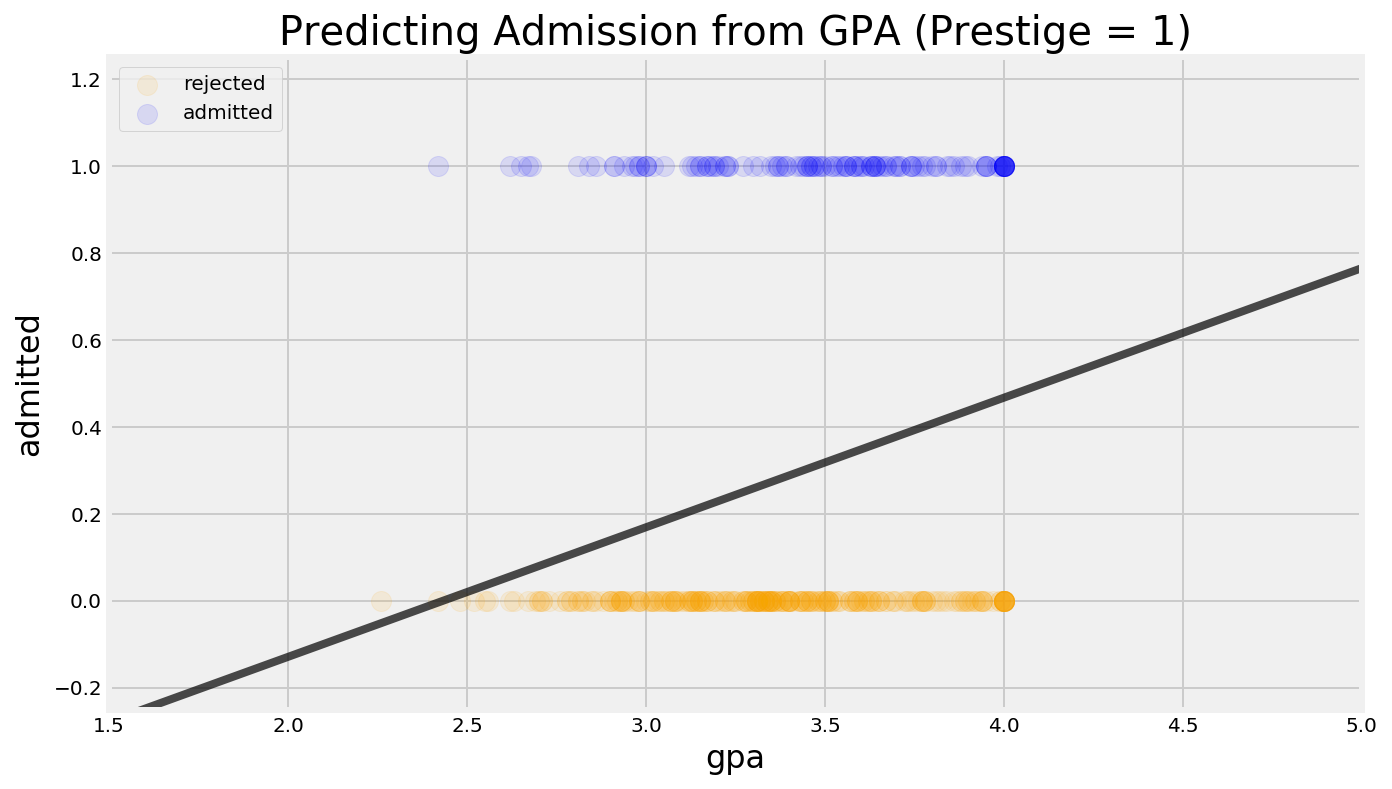

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

x_vals = np.linspace(1, 5, 300)

ax.plot(x_vals,
        linmod.predict(x_vals[:, np.newaxis]),
        color='black', alpha=0.7, lw=4)

ax.scatter(admit['gpa'][admit['admit'] == 0],
           admit['admit'][admit['admit'] == 0],
           c='orange',
           s=100,
           alpha=0.1,
           label='rejected')

ax.scatter(admit['gpa'][admit['admit'] == 1],
           admit['admit'][admit['admit'] == 1],
           c='blue',
           s=100,
           alpha=0.1,
           label='admitted')

ax.set_ylabel('admitted', fontsize=16)
ax.set_xlabel('gpa', fontsize=16)
ax.set_title('Predicting Admission from GPA (Prestige = 1)', fontsize=20)

ax.set_xlim(1.5, 5)
ax.set_ylim(-0.25, 1.25)

plt.legend(loc='upper left')
plt.show()

#### **Note:** Unless we predict exactly one value, linear regression will always predict values between $-\infty$ and $+\infty$. There are real-world cases when this is inappropriate... because we may want to just make predictions on a smaller set or range of values.

<a id='pred-binary'></a>

## Predicting a Binary Class

---

In our case we have two classes: `1=admitted` and `0=rejected`.

The logistic regression is still solving for $\hat{Y}$. However, in our binary classification case, $\hat{Y}$ will be the probability of `y` being one of the classes.

### $$\hat{Y} = P(Y = 1)$$

We'll still try to fit a "line" of best fit to this... except it won't be perfectly linear. We need to *guarantee* that the right-hand side of the regression equation will evaluate to a probability estimate.

## The Logit Link Function (advanced)

---

We will use something called a **link function** to effectively "bend" our line of best fit so that it is a curve of best fit that matches the range or set of values in which we're interested.

For logistic regression, that specific link function that transforms ("bends") our line is known as the **logit** link.

### $$\text{logit}\left(P(y = 1)\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_px_p$$

### $$\ln\left(\frac{P(y = 1)}{1 - P(y = 1)}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_px_p$$

Equivalently, we assume that each independent variable $X_i$ is linearly related to the **log of the odds of success**.

Remember, the purpose of the link function is to bend our line of best fit.
- This is convenient because we can have any values of $X$ inputs that we want, and we'll only ever predict between 0 and 1!
- However, interpreting a one-unit change gets a little harder. (More on this later.)

<a id='logistic-viz'></a>

## Fitting and making predictions with the logistic regression model.

---

In [12]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient: {logreg.coef_}')

Logistic Regression Intercept: [-5.67106435]
Logistic Regression Coefficient: [[1.38460676]]


There are two methods in `sklearn` we will use **a lot** for the rest of this course and beyond:
- `.predict()`
- `.predict_proba()`

In [13]:
X_train.head()

,gpa
175,3.37
119,2.92
377,4.00
329,2.93
141,3.52


In [14]:
admit['admit'].value_counts()

1-admit['admit'].mean()

0.6826196473551638

In [15]:
X_train.head()

,gpa
175,3.37
119,2.92
377,4.00
329,2.93
141,3.52


In [16]:
print(f'Logreg predicted values: {logreg.predict(X_train.head())}')

Logreg predicted values: [0 0 0 0 0]


In [17]:
logreg.predict(X_train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [18]:
print(f'Logreg predicted probabilities: {logreg.predict_proba(X_train.head())}')

Logreg predicted probabilities: [[0.73202865 0.26797135]
 [0.8358972  0.1641028 ]
 [0.5331108  0.4668892 ]
 [0.83398905 0.16601095]
 [0.68938561 0.31061439]]


In [19]:
logreg.predict_proba(X_train)

array([[0.73202865, 0.26797135],
       [0.8358972 , 0.1641028 ],
       [0.5331108 , 0.4668892 ],
       [0.83398905, 0.16601095],
       [0.68938561, 0.31061439],
       [0.55372028, 0.44627972],
       [0.79203655, 0.20796345],
       [0.76334241, 0.23665759],
       [0.67132239, 0.32867761],
       [0.63367594, 0.36632406],
       [0.85573629, 0.14426371],
       [0.7040125 , 0.2959875 ],
       [0.66826006, 0.33173994],
       [0.85401854, 0.14598146],
       [0.72102574, 0.27897426],
       [0.5331108 , 0.4668892 ],
       [0.70111914, 0.29888086],
       [0.82418116, 0.17581884],
       [0.92702429, 0.07297571],
       [0.79430798, 0.20569202],
       [0.62072699, 0.37927301],
       [0.5331108 , 0.4668892 ],
       [0.75575661, 0.24424339],
       [0.55372028, 0.44627972],
       [0.80538883, 0.19461117],
       [0.5707579 , 0.4292421 ],
       [0.59765713, 0.40234287],
       [0.88099185, 0.11900815],
       [0.81601101, 0.18398899],
       [0.68938561, 0.31061439],
       [0.

In [20]:
yhats = logreg.predict_proba(X_train)[:,1]

In [21]:
np.where(yhats > 0.4, 1, 0)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0])

<a id='log-odds'></a>

### Using the log-odds —the natural logarithm of the odds.

The combination of converting the "probability of success" to "odds of success," then taking the logarithm of that is called the **logit link function**.

### $$\text{logit}\big(P(Y=1)\big) = ln\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p$$

We've bent our line how we want... but how do we interpret our coefficients?

---
<a id='odds-ratios'></a>
### Odds

Probabilities and odds represent the same thing in different ways. The odds for probability **p** is defined as:

### $$\text{odds}(p) = \frac{p}{1-p}$$

The odds of a probability is a measure of how many times more likely it is than the inverse case.

For example, suppose I'm looking at the probability and odds of a specific horse, "Secretariat," winning a race.

- When **`p = 0.5`**: **`odds = 1`**
    - The horse Secretariat is as likely to win as it is to lose.
- When **`p = 0.75`**: **`odds = 3`**
    - The horse Secretariat is three times as likely to win as it is to lose.
- When **`p = 0.40`**: **`odds = 0.666..`**
   - The horse Secretariat is two-thirds as likely to win as it is to lose.

In [22]:
def odds(p):
    return (p / (1 - p))

In [23]:
#odds(0.75) -> 3/4 ... 3 thing happens ... 1 time the thing doesn't

SyntaxError: invalid syntax (<ipython-input-23-ba6c320c6223>, line 1)

In [24]:
odds(0.10)

0.11111111111111112

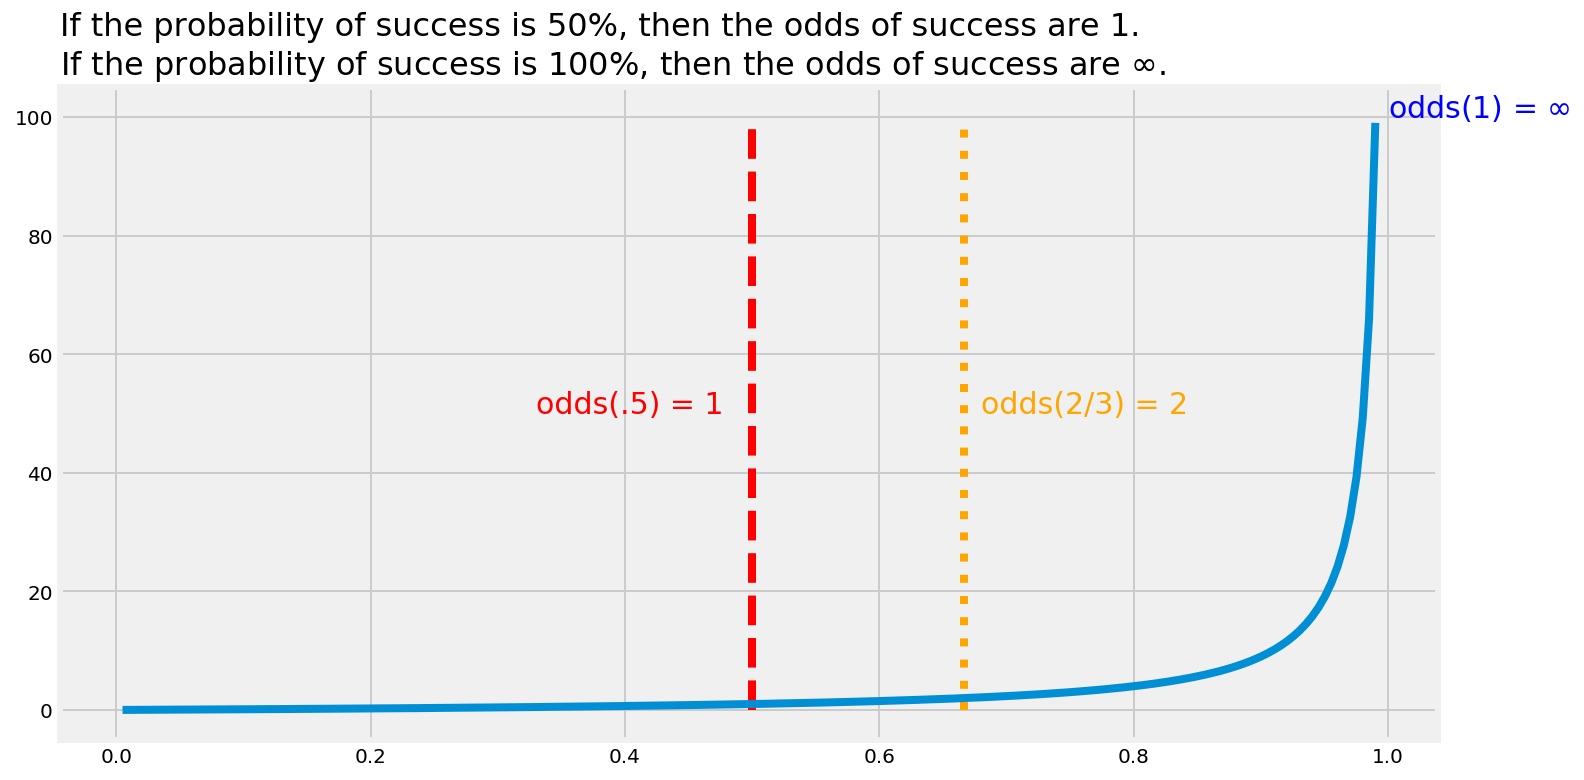

In [25]:
probabilities = np.linspace(0.005, .99, 200)

odds_list = [odds(proba) for proba in probabilities]

plt.figure(figsize=(11,6))

plt.plot(probabilities,odds_list)

plt.vlines(.5, 0, 100, linestyles="dashed", color='red')
plt.text(.33, 50, "odds(.5) = 1", fontsize=15, color = 'red')

plt.vlines(.6667, 0, 100, linestyles="dotted", color='orange')
plt.text(.68, 50, "odds(2/3) = 2", fontsize=15, color='orange')

plt.text(1, 100, "odds(1) = $\infty$", fontsize=15, color='blue')

plt.title("If the probability of success is 50%, then the odds of success are 1.\nIf the probability of success is 100%, then the odds of success are $\infty$.",
          ha = 'left',
          position = (0,1),
          fontsize=16);

## Interpreting a one-unit change in $X_i$.

$$ln\bigg(\frac{P(y=1)}{1-P(y=1)}\bigg) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_px_p$$

Given this model, a one-unit change in $X_i$ implies a $\beta_i$ unit change in the log odds of success.

**This is annoying**.

We often convert log-odds back to "regular odds" when interpreting our coefficient... our mind understands odds better than the log of odds.

So, let's get rid of the log on the left-hand side. Mathematically, we do this by "exponentiating" each side.

$$
\begin{eqnarray*}
ln\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg) &=& \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p \\
\Rightarrow e^{\Bigg\{ln\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg)\Bigg\}} &=& e^{\Bigg\{\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p\Bigg\}} \\
\Rightarrow \exp{\Bigg\{ln\bigg(\frac{P(Y=1)}{1-P(Y=1)}\bigg)\Bigg\}} &=& \exp{\Bigg\{\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p\Bigg\}} \\
\Rightarrow \frac{P(Y=1)}{1-P(Y=1)} &=& \exp{\Bigg\{\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p\Bigg\}} \\
\end{eqnarray*}
$$

**Interpretation**: A one-unit change in $X_i$ means that success is $e^{\beta_i}$ times as likely.

<details><summary> I want to interpret the coefficient $\hat{\beta}_1$ for my logistic regression model. How would I interpret this coefficient?</summary>
    
- Our model is that $ln\bigg(\frac{P(admit=1)}{1-P(admit=1)}\bigg) = \beta_0 + \beta_1\text{GPA}$.
- As GPA increases by 1, the log-odds of someone being admitted increases by 2.20.
- As GPA increases by 1, someone is $e^{2.20}$ times as likely to be admitted.
- As GPA increases by 1, someone is about 9.04 times as likely to be admitted to grad school.
</details>

> Hint: Use the [np.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) function.

In [26]:
print(f'Logistic Regression Coefficient: {logreg.coef_}')

Logistic Regression Coefficient: [[1.38460676]]


In [27]:
np.exp(logreg.coef_)

array([[3.99325529]])

In [28]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/admissions.csv')
df = df.dropna()

y = df['admit']
X = df[['gre', 'gpa', 'prestige']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

model = LogisticRegression(solver='lbfgs')
model.fit(Z_train, y_train)
model.predict_proba(Z_test)

np.exp(model.coef_)

array([[1.3562396 , 1.28235601, 0.57616046]])

In [29]:
model.intercept_

array([-0.87062038])

In [30]:
model.predict_proba(X_test)[:, 1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [31]:
1 (Yale) to 2 (Michigan State)

SyntaxError: invalid syntax (<ipython-input-31-8fe57db66f02>, line 1)

## Beyond binary classification problems.

Today, we looked at a binary classification problem: was somebody admitted, or not? Many of our classification problems will be binary. Even if the problem isn't binary, we can always force it to be binary. (i.e. Did the stock price increase or decrease?)

However, some of our classification problems won't be binary. You'll see an example of this in a later lesson!

The goal of logistic regression is to find the best-fitting model to describe the relationship between a binary outcome and a set of independent variables.

Logistic regression generates the coefficients of a formula to predict a logit transformation of the probability that the characteristic of interest is present.

**Benefits of logistic regression include:**
- It's a classification algorithm that shares similar properties to linear regression.
- It's efficient.
- It is by far the most common classification algorithm.
- The coefficients in a logistic regression model are interpretable (albeit somewhat complex); they represent the change in log-odds caused by the input variables.

<a id='solving-beta'></a>
## Solving For the Beta Coefficients (bonus)

---

Logistic regression minimizes the "deviance," which is similar to the residual sum of squares in linear regression, but is a more general form. 

**There's no closed-form solution to the beta coefficients like in linear regression, and the betas are found through optimization procedures.**
- We can't just do $\hat{\beta} = (X^TX)^{-1}X^Ty$ like we can in linear regression!

If you're particularly interested in the math, here are two helpful resources:
- [A good blog post](http://www.win-vector.com/blog/2011/09/the-simpler-derivation-of-logistic-regression/) on the logistic regression beta coefficient derivation.
- [This paper](https://www.stat.cmu.edu/~cshalizi/402/lectures/14-logistic-regression/lecture-14.pdf) is also a good reference.

<a id='logistic'></a>
## The Logistic Function (bonus)

---

The inverse function of the logit is called the **logistic function**. 

By inverting the logit, we can have the right side of our regression equation solve explicitly for $P(y = 1)$:

### $$P(y=1) = logit^{-1}\left(\beta_0 + \sum_{j}^p\beta_jx_j\right)$$

Where:

### $$logit^{-1}(a) = logistic(a) = \frac{e^{a}}{e^{a} + 1}$$ 

Giving us:

### $$P(y=1) = \frac{e^{\left(\beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_px_p\right)}}{e^{\left(\beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_px_p\right)}+1}$$